# Choosing the parameter <tt>perc</tt>

The purpose of this example is to demonstrate the effect of different choices of the <tt>perc</tt> parameter.
Roughly speaking, this parameter tells the algorithm at which geometric scale that data should be looked at when constructing the cohomological coordinates.

In [5]:
import matplotlib.pyplot as plt
from dreimac import CircularCoords, GeometryExamples, PlotUtils, CircleMapUtils
from persim import plot_diagrams

The data consists of a trefoil knot in $\mathbb{R}^3$.
As such, at a small scale, the data is parametrized by a circle wrapping around itself.
Keep in mind that, although the $2$-dimensional projection we display here seems to have self intersections, these intersections are not present in the point cloud in $\mathbb{R}^3$, at least when the point cloud is looked at from close enough.

When looked at from further away, though, the data stops looking like a circle wrapped around itself, and starts looking like a single circle without any wrapping.

We will identify this behavior by finding two circle-valued maps using the same cohomology class, but two values of the <tt>perc </tt> parameter.


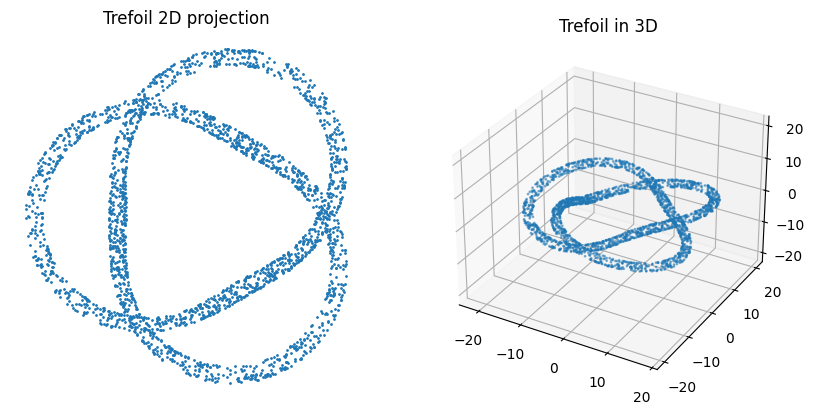

In [2]:
X = GeometryExamples.trefoil(n_samples = 2500, horizontal_width=10)
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax1.scatter(X[:,0],X[:,1], s=1)
ax1.set_title("Trefoil 2D projection") ; ax1.set_aspect("equal") ; ax1.axis("off")
ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(X[:,0],X[:,1],X[:,2], alpha=0.5, s=1)
ax2.set_title("Trefoil in 3D") ;  _ = PlotUtils.set_axes_equal(ax2)

The persistence diagram has a single high-persistence class.
It is this class that we use in this example.

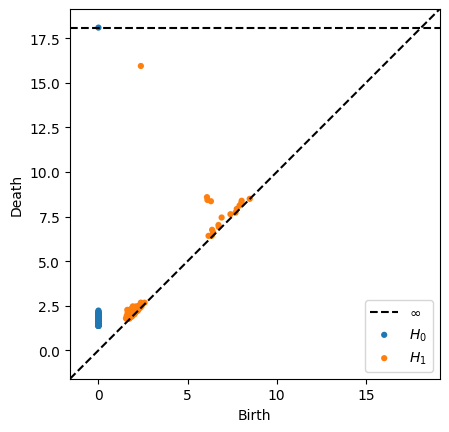

In [3]:
cc = CircularCoords(X, 300, prime=3)
plot_diagrams(cc.dgms_)

We now choose a small and a large <tt>perc</tt> parameter and get circle-valued representations that parametrized the small and large scale circularity of the data, respectively.

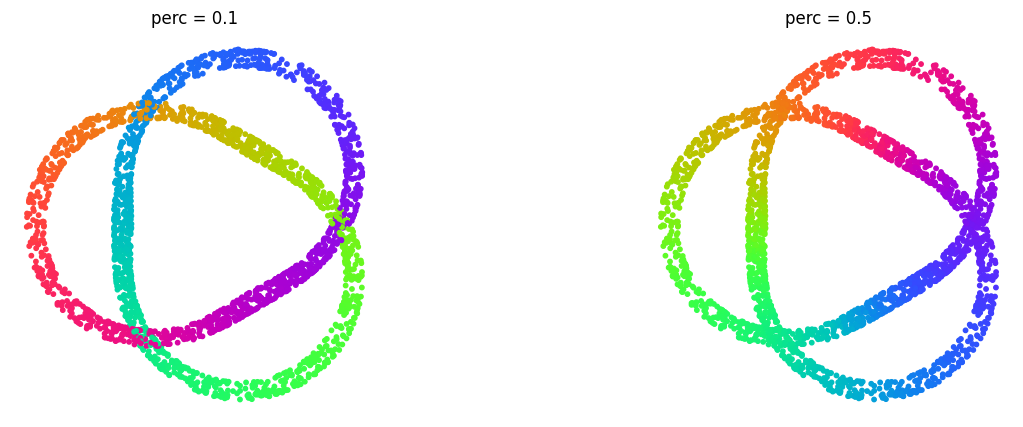

In [7]:
perc_choices = [0.1, 0.5]

plt.figure(figsize=(15,5))
for i,perc in enumerate(perc_choices):
    circular_coordinate = cc.get_coordinates(perc=perc,cocycle_idx=0)
    plt.subplot(1, len(perc_choices), i+1)
    plt.scatter(X[:,0],X[:,1], s = 10, c = CircleMapUtils.to_sinebow(circular_coordinate))
    plt.title("perc = " + str(perc))
    plt.gca().set_aspect("equal") ; _ = plt.axis("off")
